Write a program to generate marks for 10 subjects randomly using normal distribution.

1.   Range of each subject is [5, 95]
2.   If marks of any subject is less than 30 then subject will be considered fail & will b erepresented as 0 otherwise 1.
3.   Generate marks for 100000 students.
4.   Make a simple Neural Network (NN) for the above dataset.



In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

C:\Users\shubh\AppData\Local\Temp\ipykernel_12216\143504611.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(val, hist=True)


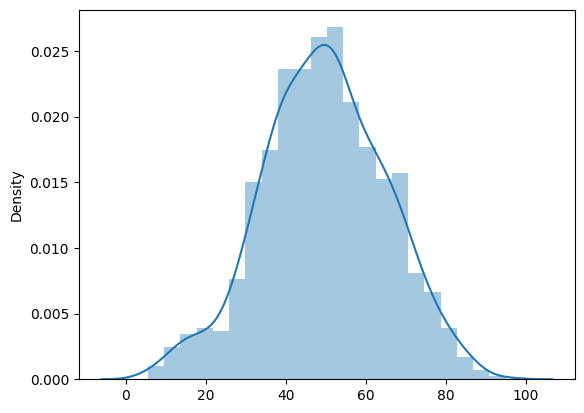

In [3]:
mean = 50
stDev = 15
val = np.random.normal(mean, stDev, size=1000)
val = np.clip(val, 5, 95)

sns.distplot(val, hist=True)
plt.show()

In [4]:
print(min(val), max(val))

5.539620319788966 95.0


In [5]:
marks = np.random.normal(mean, stDev, size=(100000, 10))
marks = np.clip(marks, 5, 95)
marks.astype(dtype='int8')

array([[54, 19, 36, ..., 63, 54, 56],
       [58, 54, 52, ..., 31, 30, 35],
       [41, 61, 21, ..., 36, 39, 47],
       ...,
       [54, 66, 36, ..., 67, 58, 80],
       [85, 46, 49, ..., 36, 91, 40],
       [24, 48, 56, ..., 54, 61, 50]], dtype=int8)

In [6]:
df = pd.DataFrame(marks, columns=[f'sub-{i}' for i in range(1, 11)])

In [9]:
df['label'] = df.apply(lambda row: int((row > 30).all()), axis=1)

In [10]:
df.sample(10)

,sub-1,sub-2,sub-3,sub-4,sub-5,sub-6,sub-7,sub-8,sub-9,sub-10,label
71541,32.669604,43.087056,31.101263,49.455561,24.517368,39.253022,36.200870,43.242290,49.868119,49.964037,0
59265,58.826947,14.948712,46.181902,58.993496,65.424175,50.035687,54.777739,45.295226,48.872506,57.320023,0
83860,38.349428,45.020553,65.003930,52.672716,62.933885,43.323194,50.550457,31.776070,85.340486,48.301468,1
59395,43.382025,44.644786,25.673598,31.979581,62.533737,50.410361,39.470897,48.855021,40.664611,33.188296,0
15321,71.278619,61.268478,46.179271,18.707138,73.912315,44.352869,40.229210,60.979043,27.459107,71.482528,0
14628,37.446000,74.801408,58.757437,59.746686,33.052254,34.435203,76.847729,70.742945,38.357737,76.921416,1
10460,34.746635,55.601934,48.067892,44.601227,53.874079,75.058398,64.499079,40.915492,10.774386,52.090062,0
47926,40.713825,54.698143,28.407305,68.458768,48.877797,81.030717,36.747288,50.907031,50.353560,30.760270,0
39086,66.600552,60.663334,56.393915,52.379413,48.069362,59.174831,41.086838,54.728796,81.329328,41.640840,1
74260,54.004730,43.565289,51.090175,34.579558,44.914378,55.157619,43.105350,49.714939,58.123074,41.325669,1


In [12]:
df['label'].value_counts()

label
0    61778
1    38222
Name: count, dtype: int64

In [13]:
df.to_csv('datasetMarks.csv')

In [40]:
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [41]:
X = df.drop('label', axis=1).values
Y = df['label'].values

In [49]:
xTrain, xTest, yTrain, yTest = train_test_split(X, Y, test_size=0.1, random_state=6)
model = Perceptron(max_iter=1000, eta0=0.01, random_state=6)
model.fit(xTrain, yTrain)

Perceptron(eta0=0.01, random_state=6)

In [50]:
yPred = model.predict(xTest)

In [51]:
report = classification_report(yTest, yPred)
print(report)

              precision    recall  f1-score   support

           0       0.74      0.63      0.68      6136
           1       0.52      0.64      0.58      3864

    accuracy                           0.64     10000
   macro avg       0.63      0.64      0.63     10000
weighted avg       0.66      0.64      0.64     10000

